### 1. Import libraries

### 2. Import data

### 3. Subset data

### 4. Clean data
  <ul>
<li>4.1 Check columns</li>
    <li>4.2 Check missing values</li>
    <li>4.3 Check duplicates</li>
  </ul>

### 5. The Elbow technique

### 6. K-means clustering

### 7. Descriptive statistics 

### 8. Scatterplot

### 9. Line chart

# 1. Import libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [87]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Import data

In [88]:
# Creata a path

path = r'/Users/marie/Documents/CareerFoundry/11-2021 City Temperatures'

In [89]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'city_temperatures_more_clean.csv'))

# 3. Subset data

In [90]:
# Create a subset of the dataframe to only keep the numerical variables

df = df[['Year','AvgTemperature']]

In [91]:
df.shape

(2867077, 2)

# 4. Clean data

### 4.1 Check columns

In [92]:
# Check columns

df.columns

Index(['Year', 'AvgTemperature'], dtype='object')

### 4.2 Check missing values

In [93]:
# Check for missing values

df.isnull().sum()

Year              0
AvgTemperature    0
dtype: int64

### 4.3 Check duplicates

In [94]:
# Check for duplicates

dups = df.duplicated()

In [95]:
dups.shape

(2867077,)

# 5. The Elbow technique

In [96]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [97]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1164146962.7210367,
 -470061861.1493119,
 -311245621.18555343,
 -248072646.70859903,
 -205527442.41639137,
 -171115968.85619107,
 -146465378.96829695,
 -125707849.73715395,
 -110674814.23487239]

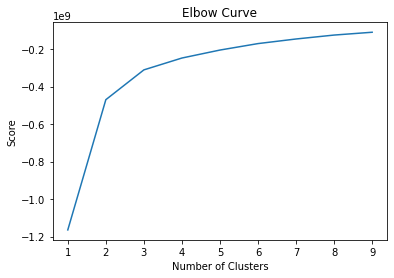

In [57]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal count for the cluster is 3.

# 6. K-means clustering

In [58]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [59]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [60]:
df['clusters'] = kmeans.fit_predict(df)

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [61]:
df.head()

,Year,AvgTemperature,clusters
0,1995,64.2,0
1,1995,49.4,0
2,1995,48.8,0
3,1995,46.4,0
4,1995,47.9,0


In [62]:
df['clusters'].value_counts()

1    1150191
0    1104651
2     612235
Name: clusters, dtype: int64

# 7. Descriptive statistics for the clusters

In [80]:
# Group by "clusters" using loc.

df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [81]:
# Print the descriptive statistics for the clusters.

df.groupby('cluster').agg({'Year':['mean', 'median'], 
                         'AvgTemperature':['mean', 'median']})

Year        AvgTemperature       
                    mean median           mean median
cluster                                              
dark purple  2006.697160   2007      32.267683   34.9
pink         2006.175841   2006      57.917340   58.7
purple       2007.254718   2007      78.115309   77.9

# 8. Scatterplot

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


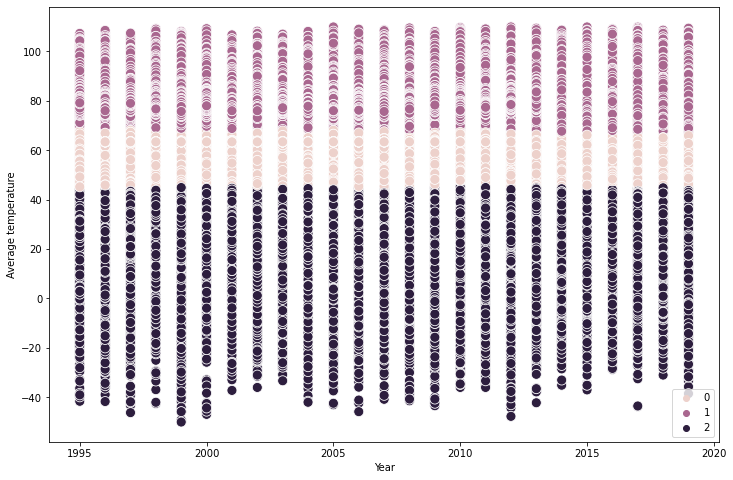

In [63]:
# Plot the clusters for the "Year" and "AvgTemperature" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Year'], y=df['AvgTemperature'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year') # Label x-axis.
plt.ylabel('Average temperature') # Label y-axis.
plt.show()

#### The Scatterplot is not a good chart for visualization of this dataset. Since the temperature is similar at each data point the Scatterplot looks more striped than spotted. I'll use a line chart instead.

# 9. Line chart

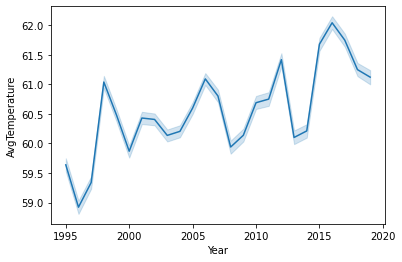

In [66]:
# Create a line chart 

line = sns.lineplot(data = df, x = 'Year',y = 'AvgTemperature')

#### Here you can clearly see how the temperature rises over time. The largest peak 2016-2017.

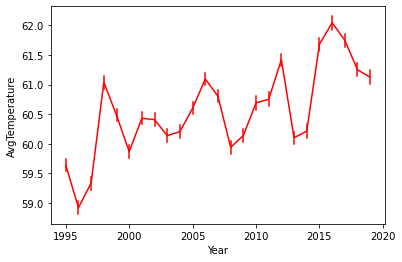

In [79]:
# Create another type of linechart

sns.lineplot(x = 'Year', y = 'AvgTemperature', color='r', err_style='bars', data = df)
plt.show()